In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import torch
import numpy as np
import pandas as pd

from notebook_utils import *

In [ ]:
all_metrics = {}

In [ ]:
strategies_names = [
    "aleatoric_propagated",
    "educated_random",
    "augment_latent",
    "age",
    "anrmab",
    "entropy",
    "tta_expected_query_score",
    "random",
]
metrics_dict_cora_gcn = load_results(
    "cora_ml",
    "gcn",
    strategies_names,
    save=False,
    cached=True,
    cache_path="../other_data",
)
all_metrics[("cora_ml", "gcn")] = metrics_dict_cora_gcn

Loading cached metrics


In [ ]:
strategies_names = ["aleatoric_propagated", "age", "anrmab", "entropy", "random","approximate_uncertainty_mp"]
metrics_dict_cora_sgc = load_results(
    "cora_ml",
    "sgc",
    strategies_names,
    save=False,
    cached=False,
    cache_path="../other_data",
)
all_metrics[("cora_ml", "sgc")] = metrics_dict_cora_sgc

Loading metrics cora_ml sgc
	aleatoric_propagated metrics
['fnoise_emask_100_filter_probs_0.5_0.3', 'fnoise_emask_100_filter_probs_0.1_0.3', 'fmask_emask_100_filter_probs_0.1_0.3', 'fnoise_emask_100_filter_probs_0.4_0.5', 'fmask_emask_100_filter_probs_0.3_0.4', 'fmask_emask_100_filter_probs_0.3_0.3', 'fmask_emask_100_filter_probs_0.4_0.4', 'fmask_emask_100_filter_probs_0.4_0.3', 'fnoise_emask_100_filter_probs_0.5_0.1', 'fmask_emask_100_filter_probs_0.4_0.2', 'fmask_emask_100_filter_probs_0.2_0.4', 'fmask_emask_200_filter_logit_0.5_0.4', 'fnoise_emask_100_filter_probs_0.5_0.2', 'fnoise_emask_100_filter_probs_0.2_0.1', 'fnoise_emask_100_filter_probs_0.4_0.2', 'fmask_emask_100_filter_probs_0.5_0.1', 'fnoise_emask_100_filter_probs_0.4_0.4', 'None', 'fnoise_emask_100_filter_probs_0.1_0.2', 'fmask_emask_100_filter_probs_0.5_0.4', 'fmask_emask_100_filter_probs_0.4_0.5', 'fnoise_emask_100_filter_probs_0.1_0.1', 'fnoise_emask_100_filter_probs_0.3_0.5', 'fnoise_emask_100_filter_probs_0.4_0.1', '

In [107]:
all_metrics[("cora_ml", "sgc")] = {
    k: v for k, v in all_metrics[("cora_ml", "sgc")].items()
    if not ("approximate_uncertainty_mp" in k and "None" not in k)
}

In [108]:
for dataset in ["citeseer", "pubmed", "amazon_photos"]:
    for model in ["gcn", "sgc"]:
        strategies_names = ["aleatoric_propagated", "age", "anrmab", "entropy"]
        metrics_dict = load_results(
            dataset,
            model,
            strategies_names,
            save=False,
            cached=False,
            cache_path="../other_data",
        )
        all_metrics[(dataset, model)] = metrics_dict

Loading metrics citeseer gcn
	aleatoric_propagated metrics
['None', 'fnoise_emask_200_filter_probs_0.4_0.4', 'fmask_emask_200_filter_probs_0.5_0.4']
	age metrics
['None', 'fnoise_emask_200_filter_probs_0.4_0.4', 'fmask_emask_200_filter_probs_0.5_0.4']
	anrmab metrics
['None', 'fnoise_emask_200_filter_probs_0.4_0.4', 'fmask_emask_200_filter_probs_0.5_0.4']
	entropy metrics
['None', 'fnoise_emask_200_filter_probs_0.4_0.4', 'fmask_emask_200_filter_probs_0.5_0.4']
Loading metrics citeseer sgc
	aleatoric_propagated metrics
['None', 'fnoise_emask_200_filter_probs_0.4_0.4', 'fmask_emask_200_filter_probs_0.5_0.4']
	age metrics
['None', 'fnoise_emask_200_filter_probs_0.4_0.4', 'fmask_emask_200_filter_probs_0.5_0.4']
	anrmab metrics
['None', 'fnoise_emask_200_filter_probs_0.4_0.4', 'fmask_emask_200_filter_probs_0.5_0.4']
	entropy metrics
['None', 'fnoise_emask_200_filter_probs_0.4_0.4', 'fmask_emask_200_filter_probs_0.5_0.4']
Loading metrics pubmed gcn
	aleatoric_propagated metrics
['fnoise_emas

In [109]:
runs = combine_geem_metrics("cora_ml","geem")
agg, stds = aggregate_geem_metrics("cora_ml","geem")
# all_metrics[("cora_ml", "gcn")]["geem"] = (agg["accuracy/test"], stds["accuracy/test"], agg, runs)
all_metrics[("cora_ml", "sgc")]["geem"] = (
    agg["accuracy/test"],
    stds["accuracy/test"],
    agg,
    runs,
)

In [110]:
runs = combine_geem_metrics("cora_ml","approximate_uncertainty_esp")
agg, stds = aggregate_geem_metrics("cora_ml","approximate_uncertainty_esp")
# all_metrics[("cora_ml", "gcn")]["geem"] = (agg["accuracy/test"], stds["accuracy/test"], agg, runs)
all_metrics[("cora_ml", "sgc")]["approximate_uncertainty_esp"] = (
    agg["accuracy/test"],
    stds["accuracy/test"],
    agg,
    runs,
)

In [ ]:
del all_metrics[("cora_ml", "gcn")]["aleatoric_propagated_fmask_emask_100_filter_probs_0.5_0.4_save"]

In [121]:
df_combineds = {}
for (dataset, model), metrics_dict in all_metrics.items():
    df_combined, df = create_df(metrics_dict)
    df_combineds[(dataset, model)] = (df_combined, df)

In [112]:
df_combined, df = df_combineds[("cora_ml", "gcn")]

In [76]:
strategy_mapping = {
    "aleatoric": "LC",
    "educated": "ER",
    "augment": "LC",
}

In [119]:
for x in df_tmp.index:
    print(x)
    get_count_dict_binned_stats(all_metrics[("cora_ml", "gcn")][x][3]) 

tta_expected_query_score_aleatoric_propagated_fmask_emask_200_filter_0.5_0.4
aleatoric_propagated_fmask_emask_200_filter_probs_0.5_0.4
aleatoric_propagated_fmask_emask_2000_filter_probs_0.5_0.4
educated_random_aleatoric_propagated_60_0
entropy_fnoise_emask_100_filter_probs_0.3_0.4
entropy_fnoise_emask_100_filter_probs_0.5_0.2
aleatoric_propagated_fmask_emask_100_filter_probs_0.5_0.4
educated_random_aleatoric_propagated_60_1
aleatoric_propagated_fnoise_emask_100_filter_probs_0.4_0.3
entropy_fnoise_emask_100_filter_probs_0.5_0.5
aleatoric_propagated_fmask_emask_100_filter_probs_0.5_0.5
aleatoric_propagated_fmask_emask_200_filter_logit_0.5_0.4
aleatoric_propagated_fmask_emask_200_filter_logits_0.5_0.4
aleatoric_propagated_fmask_emask_100_filter_probs_0.3_0.2
educated_random_aleatoric_propagated_70_0
educated_random_aleatoric_propagated_fmask_emask_100_filter_probs_0.5_0.4_80.0_1
aleatoric_propagated_fmask_emask_100_filter_probs_0.4_0.3
aleatoric_propagated_fnoise_emask_100_filter_probs_0.

KeyError: 'aleatoric_propagated_fmask_emask_100_filter_probs_0.5_0.4_save'

In [113]:
def get_count_dict(t, num_nodes = 2810):
    ixs = torch.tensor([l[1:] for l in t["acquired_idxs"]]).flatten()
    count = torch.bincount(ixs, minlength=num_nodes)
    keys = torch.where(count)
    count_dict = {k.item():count[k].item() for k in keys[0]}
    return count_dict, count,ixs

In [114]:
def get_count_dict_binned_stats(t, num_nodes = 2810, num_acquired = 28):
    reshaped_ixs = get_count_dict(t,num_nodes)[2].view(5,5,-1)
    reshaped_ixs.shape
    reshaped_bin_count_split = torch.stack([torch.bincount(reshaped_ixs[i].flatten(), minlength=2810) for i in range(reshaped_ixs.shape[0])])
    reshaped_bin_count_init = torch.stack([torch.bincount(reshaped_ixs[:,i,:].flatten(), minlength=2810) for i in range(reshaped_ixs.shape[1])])
    by_split =((reshaped_bin_count_split > 0).sum()).item()/(5*5*num_acquired)
    by_init = ((reshaped_bin_count_init > 0).sum()).item()/(5*5*num_acquired)
    return by_split, by_init

In [122]:
df_combined = []
for d_m_key in [("cora_ml", "sgc"), ("cora_ml", "gcn")]:
    # d_m_key = ("cora_ml", "sgc")
    df_tmp = df_combineds[d_m_key][0].copy()
    l = [get_count_dict(all_metrics[d_m_key][x][3]) for x in df_tmp.index]
    df_tmp["num_acquired_indices"] = [len(i[0]) for i in l]
    df_tmp["num_acquired_indices"] /= 700
    binned_stats = [
        get_count_dict_binned_stats(all_metrics[d_m_key][x][3]) for x in df_tmp.index
    ]
    df_tmp["index_original"] = df_tmp.index
    df_tmp.index = df_tmp.index.str.replace("approximate_uncertainty_", "")
    df_tmp["num_acquired_by_split"] = [i[0] for i in binned_stats]
    df_tmp["num_acquired_by_init"] = [i[1] for i in binned_stats]
    df_tmp["max_acquired"] = [i[1].max().item() for i in l]
    df_tmp["max_acquired_index"] = [i[1].argmax().item() for i in l]
    df_tmp["strategy"] = [i.split("_")[0] for i in df_tmp.index]
    df_tmp["tta"] = [
        (
            "TTA"
            if ("probs" in i) or ("logits" in i) or ("latent" in i)
            else "EQS" if "tta" in i else "NO"
        )
        for i in df_tmp.index
    ]
    df_tmp["filter"] = [True if "_filter" in i else False for i in df_tmp.index]
    if len(df_tmp.loc[(df_tmp["tta"] == "EQS"), "strategy"]) > 0:
        df_tmp.loc[(df_tmp["tta"] == "EQS"), "strategy"] = [
            x.split("_")[4] for x in df_tmp.loc[(df_tmp["tta"] == "EQS")].index
        ]
    df_tmp["adapted"] = df_tmp.index.str.contains("iquery") | df_tmp.index.str.contains(
        "itrain"
    )
    df_tmp["strategy"] = (
        df_tmp["strategy"].map(strategy_mapping).fillna(df_tmp["strategy"])
    )
    df_tmp["strategy"] = df_tmp["strategy"].str.upper()
    df_tmp["dataset"] = d_m_key[0]
    df_tmp["model"] = d_m_key[1]
    df_tmp["name_final"] = df_tmp.apply(name_fn, axis=1)
    df_tmp["name_final2"] = df_tmp["strategy"]
    df_tmp.loc[((df_tmp["name_final2"] == "LC") & (df_tmp["filter"])), "name_final2"] = (
        "LC Filtered"
    )
    
    df_tmp.index = df_tmp.index + "_" + d_m_key[1]

    df_combined.append(df_tmp)

big_cora_df = pd.concat(df_combined)

In [123]:
big_cora_df["num_diff"] = (
    big_cora_df["num_acquired_by_init"] - big_cora_df["num_acquired_by_split"]
)

In [124]:
gcn_cora_df = big_cora_df.loc[(big_cora_df["model"] == "gcn")].copy()
geem = big_cora_df.loc[(big_cora_df["strategy"] == "GEEM")].copy()
esp = big_cora_df.loc[(big_cora_df["strategy"] == "ESP")].copy()
mp = big_cora_df.loc[(big_cora_df["strategy"] == "MP")].copy()
geem = compute_stds(geem,"cora_ml", all_metrics)
esp = compute_stds(esp,"cora_ml", all_metrics)
mp = compute_stds(mp,"cora_ml", all_metrics)
gcn_cora_df = compute_stds(gcn_cora_df,"cora_ml", all_metrics)

gcn_cora_df = pd.concat([gcn_cora_df, geem, esp, mp], axis=0)
gcn_cora_df.sort_index(inplace=True)

In [125]:
highest_28_mean = gcn_cora_df.loc[gcn_cora_df.groupby("name_final")["28_mean"].idxmax()]

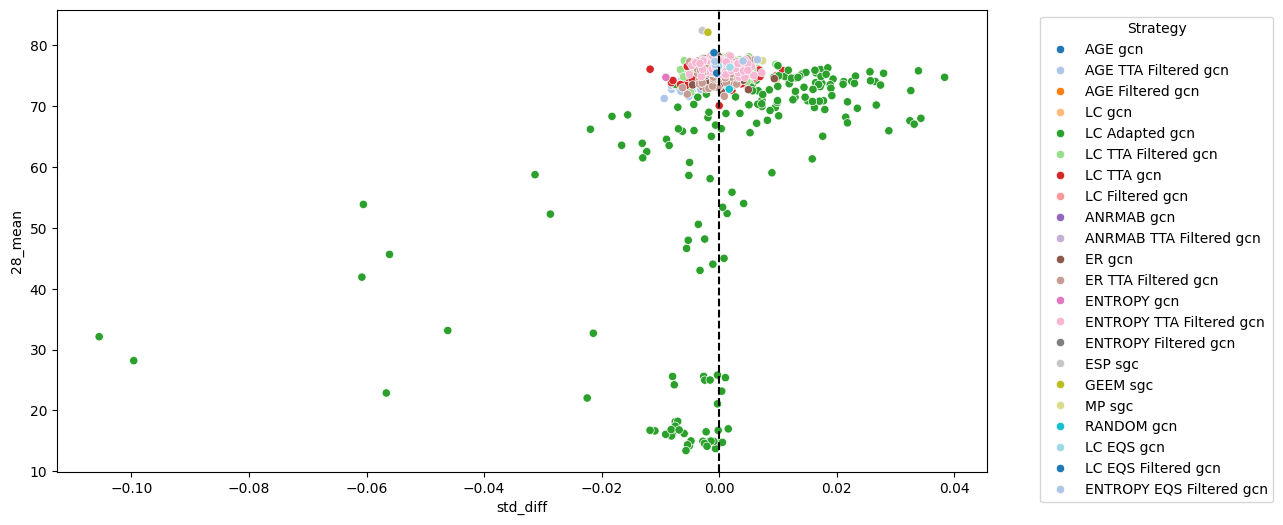

In [126]:
plt.figure(figsize=(12, 6))
# to_plot = pd.concat([gcn_cora_df[gcn_cora_df.index.str.contains("None")], highest_28_mean], axis=0)
# to_plot = highest_28_mean
to_plot = gcn_cora_df
sns.scatterplot(
    data=to_plot, x="std_diff", y="28_mean", hue="name_final", palette="tab20"
)
plt.axvline(0, color="black", linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Strategy")
plt.show()

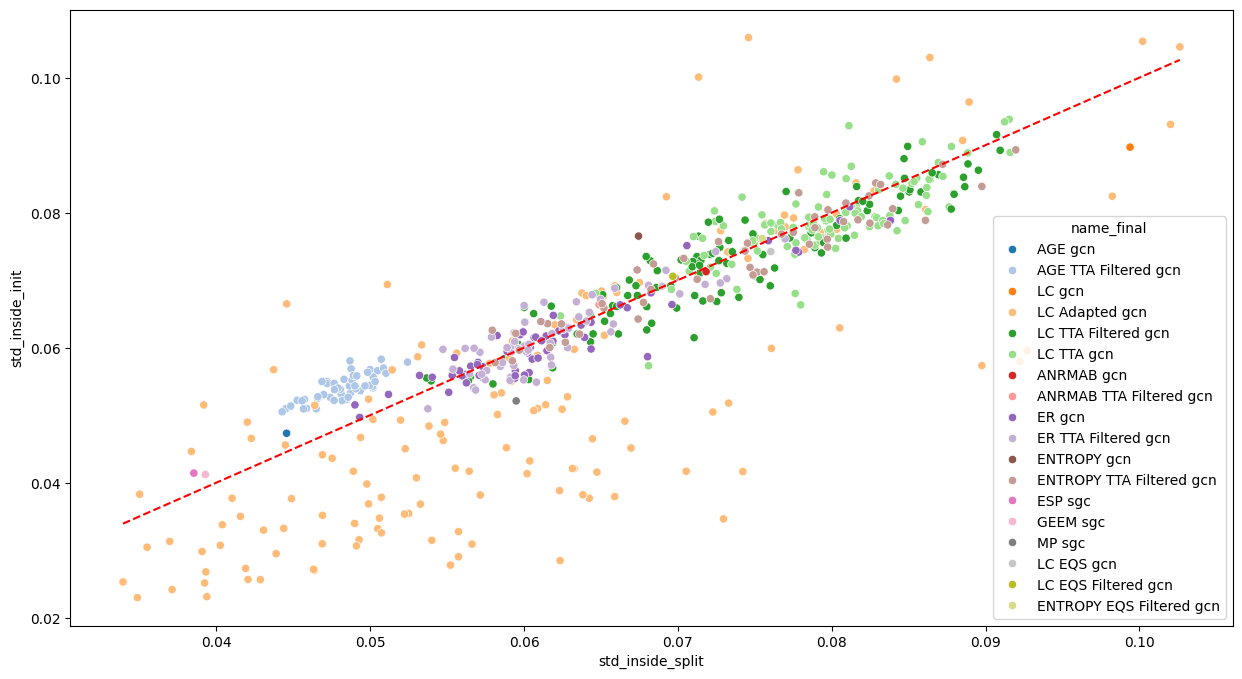

In [110]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=gcn_cora_df,
    x="std_inside_split",
    y="std_inside_init",
    hue="name_final",
    palette="tab20",
)
plt.plot(
    [gcn_cora_df["std_inside_split"].min(), gcn_cora_df["std_inside_split"].max()],
    [gcn_cora_df["std_inside_split"].min(), gcn_cora_df["std_inside_split"].max()],
    color="red",
    linestyle="--",
    label="x=y",
)

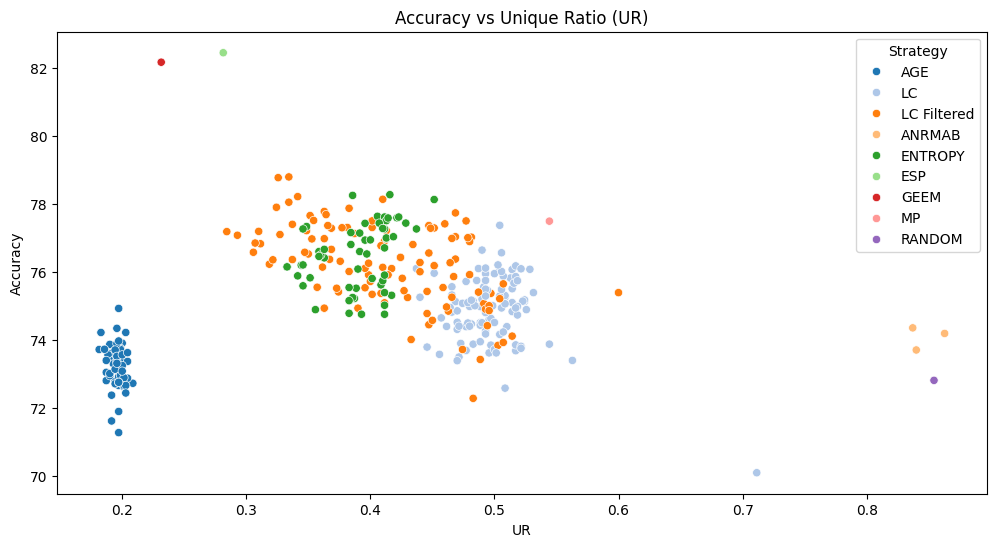

In [140]:
to_plot = big_cora_df[ ~(big_cora_df["adapted"]) &  ~(big_cora_df["tta"] == "EQS")  &  ~(big_cora_df["name_final2"] == "ER")  &( (big_cora_df["model"] == "gcn") |(big_cora_df["strategy"] == "GEEM")) |(big_cora_df["strategy"] == "ESP") |(big_cora_df["strategy"] == "MP") ].copy()
to_plot.sort_index(inplace=True)
plt.figure(figsize=(12,6))
sns.scatterplot(data=to_plot, x="num_acquired_indices", y="28_mean", hue="name_final2", palette="tab20")
plt.xlabel("UR")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Unique Ratio (UR)")
plt.legend(loc='upper right', title="Strategy")
# plt.legend( loc='best', title="Strategy")

plt.show()

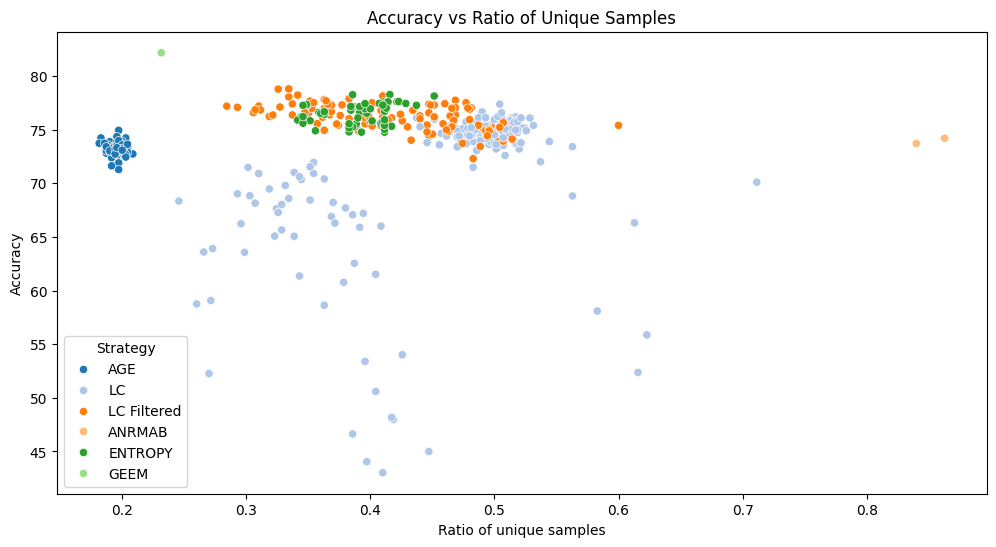

In [ ]:
to_plot = big_cora_df[~big_cora_df.index.str.contains("iquery") &  ~(big_cora_df["tta"] == "EQS") & ~big_cora_df.index.str.contains("educated") &( (big_cora_df["model"] == "gcn") |(big_cora_df["strategy"] == "GEEM")) ].copy()
to_plot.sort_index(inplace=True)
plt.figure(figsize=(12,6))
sns.scatterplot(data=to_plot, x="num_acquired_indices", y="28_mean", hue="name_final2", palette="tab20")
plt.xlabel("UR")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Unique Ratio (UR)")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Strategy")
plt.legend( loc='best', title="Strategy")

plt.show()

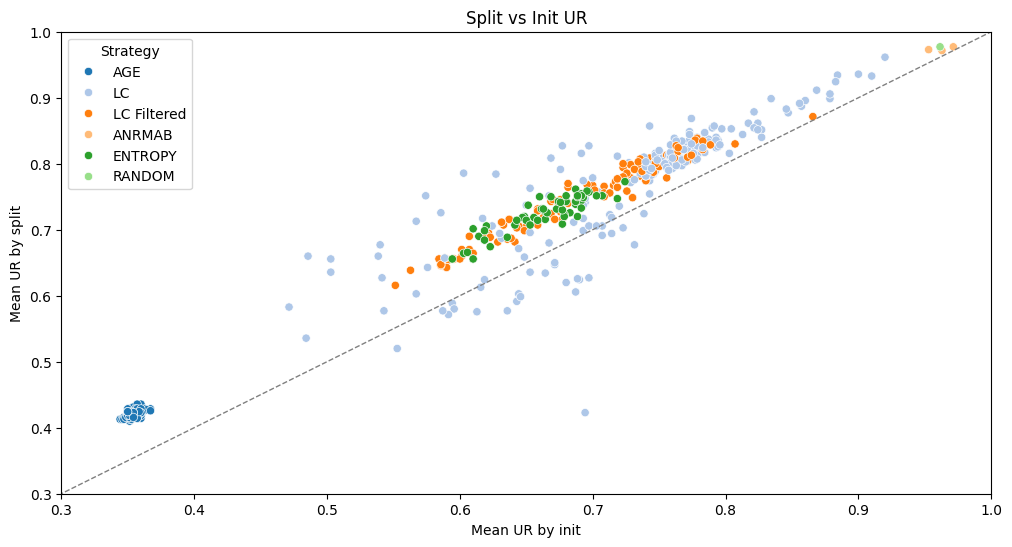

In [139]:
to_plot = big_cora_df[  ~big_cora_df.index.str.contains("iquery") &  ~(big_cora_df["tta"] == "EQS") & ~big_cora_df.index.str.contains("educated") &( (big_cora_df["model"] == "gcn") ) ].copy()
to_plot.sort_index(inplace=True)
plt.figure(figsize=(12,6))
sns.scatterplot(data=to_plot, x="num_acquired_by_split", y="num_acquired_by_init", hue="name_final2", palette="tab20")
plt.xlabel("Mean UR by init")
plt.ylabel("Mean UR by split")
plt.title("Split vs Init UR")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Strategy")
plt.legend( loc='best', title="Strategy")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", linewidth=1)
plt.xlim(0.3, 1)
plt.ylim(0.3, 1)
plt.show()

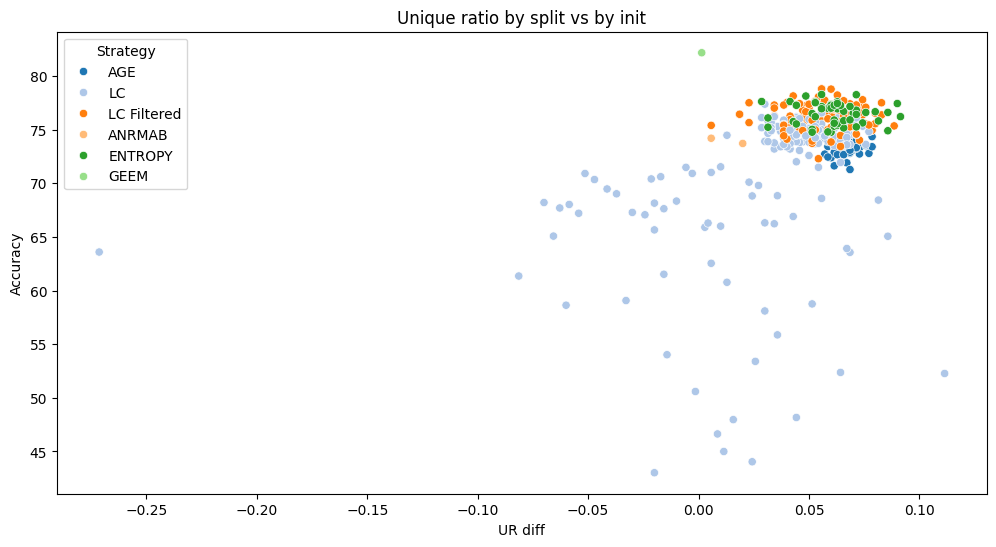

In [114]:
to_plot = big_cora_df[  ~big_cora_df.index.str.contains("iquery") &  ~(big_cora_df["tta"] == "EQS") & ~big_cora_df.index.str.contains("educated") &( (big_cora_df["model"] == "gcn") |(big_cora_df["strategy"] == "GEEM")) ].copy()
to_plot.sort_index(inplace=True)
plt.figure(figsize=(12,6))
sns.scatterplot(data=to_plot, x="num_diff", y="28_mean", hue="name_final2", palette="tab20")
plt.xlabel("UR diff")
plt.ylabel("Accuracy")
plt.title("Unique ratio by split vs by init")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Strategy")
plt.legend( loc='best', title="Strategy")

plt.show()

In [115]:
# d = []
# for k,v in metrics_dict_cora_gcn.items():
#     cd, c, i = get_count_dict(v[3])
#     d.append([k,len(cd), c.max().item(), c.argmax().item()])

# count_dict_df = pd.DataFrame(d, columns=["key", "num_acquired_indices", "max_acquisitions", "max_acquisition_index"])
# count_dict_df.sort_values(by="num_acquired_indices", ascending=True, inplace=True)
# count_dict_df

In [116]:
def jaccard_index(x, all_metrics):
    a = get_count_dict(all_metrics[("cora_ml", x["model_1"])][x["index_original_1"]][3])[
        0
    ].keys()
    b = get_count_dict(all_metrics[("cora_ml", x["model_2"])][x["index_original_2"]][3])[
        0
    ].keys()
    a = set(a)
    b = set(b)
    return len(a.intersection(b)) / len(a.union(b))


def create_jaccard_pivot(df):

    cartesian_product = pd.merge(
        df[["index_original", "model", "name_final"]].reset_index(),
        df[["index_original", "model", "name_final"]].reset_index(),
        how="cross",
        suffixes=("_1", "_2"),
    )
    cartesian_product[["index_original_1", "model_1", "index_original_2", "model_2"]]
    cartesian_product["jaccard"] = cartesian_product.apply(
        lambda x: jaccard_index(x, all_metrics), axis=1
    )
    cartesian_product.sort_values(by=["model_1", "model_2"], inplace=True)

    jaccard_pivot = cartesian_product.pivot(
        index="name_final_1",
        columns="name_final_2",
        values="jaccard",
    )
    return jaccard_pivot

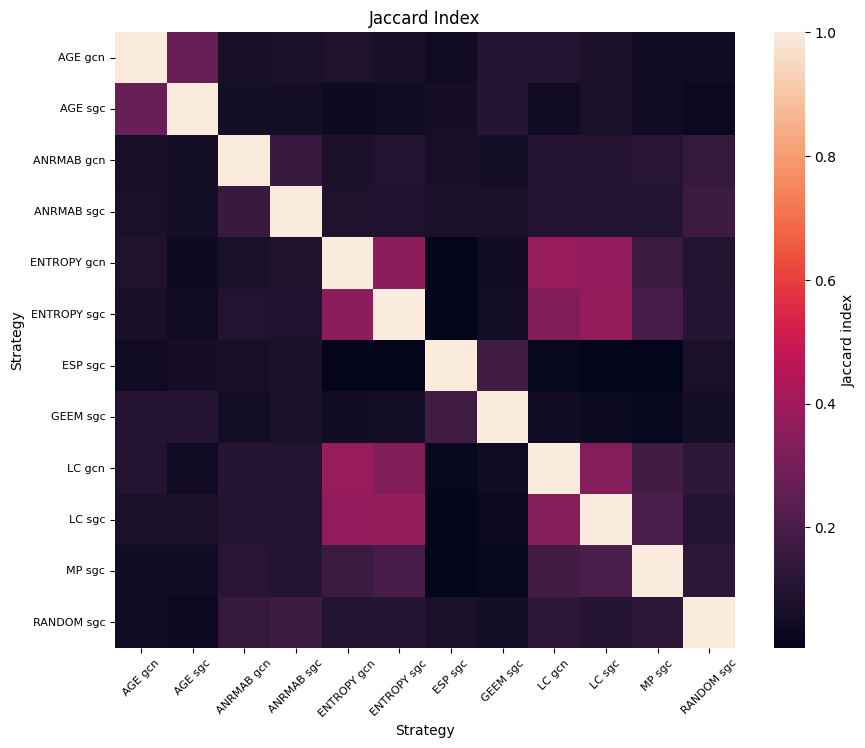

In [117]:
df = big_cora_df[
    (big_cora_df["tta"] == "NO")
    & ~big_cora_df["adapted"]
    & (big_cora_df["strategy"] != "ER")
]
jaccard_pivot_cora = create_jaccard_pivot(df)
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_pivot_cora,cbar_kws={'label': 'Jaccard index'})
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.title("Jaccard Index")
plt.xlabel("Strategy")
plt.ylabel("Strategy")

plt.show()


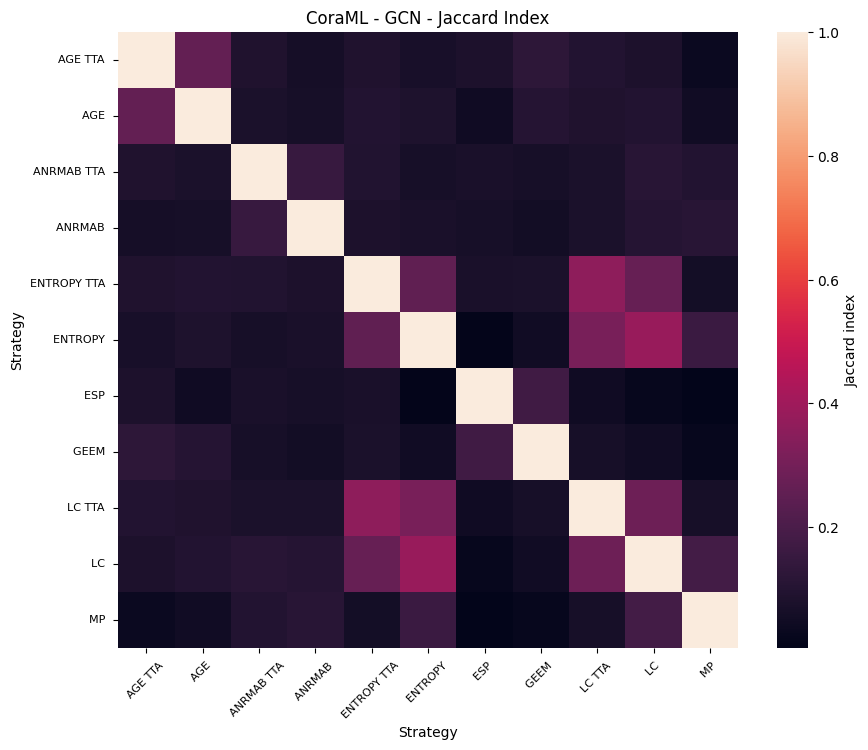

In [118]:
df = highest_28_mean[(highest_28_mean["name_final"].str.contains("TTA Filtered") | highest_28_mean["index_original"].str.contains("None")) & ~highest_28_mean["name_final"].str.contains("ER") | highest_28_mean["name_final"].str.contains("GEEM") |highest_28_mean["name_final"].str.contains("ESP") | highest_28_mean["name_final"].str.contains("MP") ]
jaccard_pivot_tta = create_jaccard_pivot(df)
jaccard_pivot_tta.index = jaccard_pivot_tta.index.str.replace("gcn|sgc|Filtered ", "", regex=True)
jaccard_pivot_tta.columns = jaccard_pivot_tta.columns.str.replace("gcn|sgc|Filtered ", "", regex=True)
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_pivot_tta,cbar_kws={'label': 'Jaccard index'})
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.title("CoraML - GCN - Jaccard Index")
plt.xlabel("Strategy")
plt.ylabel("Strategy")

plt.show()

In [ ]:
key1 = "aleatoric_propagated_None"
key2 = "entropy_None"
d_m_key = ("cora_ml", "sgc")

count_dict_1, count_1, ixs_1 = get_count_dict(all_metrics[d_m_key][key1][3])
# count_dict_1, count_1, ixs_1 = get_count_dict(runs)
print(f"Maximally acquired index: {count_1.argmax()} with {count_1.max()} acquisitions")

count_dict_2, count_2, ixs_2 = get_count_dict(all_metrics[d_m_key][key2][3])
print(f"Maximally acquired index: {count_2.argmax()} with {count_2.max()} acquisitions")
print("------")

print(
    f"Intersection of acquired indices: {len(set(count_dict_1.keys()).intersection(set(count_dict_2.keys())))}"
)
print(
    f"Union of acquired indices: {len(set(count_dict_1.keys()).union(set(count_dict_2.keys())))}"
)
print(f"{key1} acquired indices: {len(count_dict_1)}")
print(f"{key2} acquired indices: {len(count_dict_2)}")